# Case Study_Human Resourse Dataset

* <b>Human_Resources.csv<b/> Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

#### Task 1:Import your libraries

In [3]:
#Import the libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotnine import *
import warnings

In [4]:
df = pd.read_csv('Human_Resources.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
#Attach the Human_Resources.csv file and view the first five records
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# show all the file data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Show the following basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Task 2:VISUALIZE DATASET

In [9]:
# Replace 'Attrition','Overtime' and 'Over18' columns with integers before performing any visualizations 
# Identify columns with 'Yes' and 'No' values
yes_no_columns = ['Attrition','Over18', 'OverTime']  # Add other columns with 'Yes'/'No' values if any

# Map 'yes' and 'no' to 1 and 0
for column in yes_no_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})


In [10]:
# display the current first four records
# Verify the changes
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [11]:
# Drop 'EmployeeNumber','EmployeeCount' ,'Standardhours' and 'Over18' since they do not change from one employee to the other
df = df.drop(['EmployeeNumber','EmployeeCount' ,'StandardHours','Over18'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [12]:
employee_df = df

In [13]:
# Let's see how many employees left the company! 
left_df        = employee_df[employee_df['Attrition'] == 1]
stayed_df      = employee_df[employee_df['Attrition'] == 0]

In [14]:
total_employees = len(employee_df)
left_employee = len(left_df)
left_percentage = len(left_df)/len(employee_df)
stayed_employee = len(stayed_df)
stayed_percentage = len(stayed_df)/len(employee_df)




In [15]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
# Display the results
print(f"Total = {total_employees}")
print(f"Number of employees who left the company = {left_employee}")
print(f"Percentage of employees who left the company = {left_percentage*100} %")
print(f"Number of employees who did not leave the company (stayed) = {stayed_employee}")
print(f"Percentage of employees who did not leave the company (stayed) = {stayed_percentage*100} %")



Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


In [16]:
numeric_df = df.select_dtypes(include=[float, int])

In [17]:
numeric_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


<Axes: >

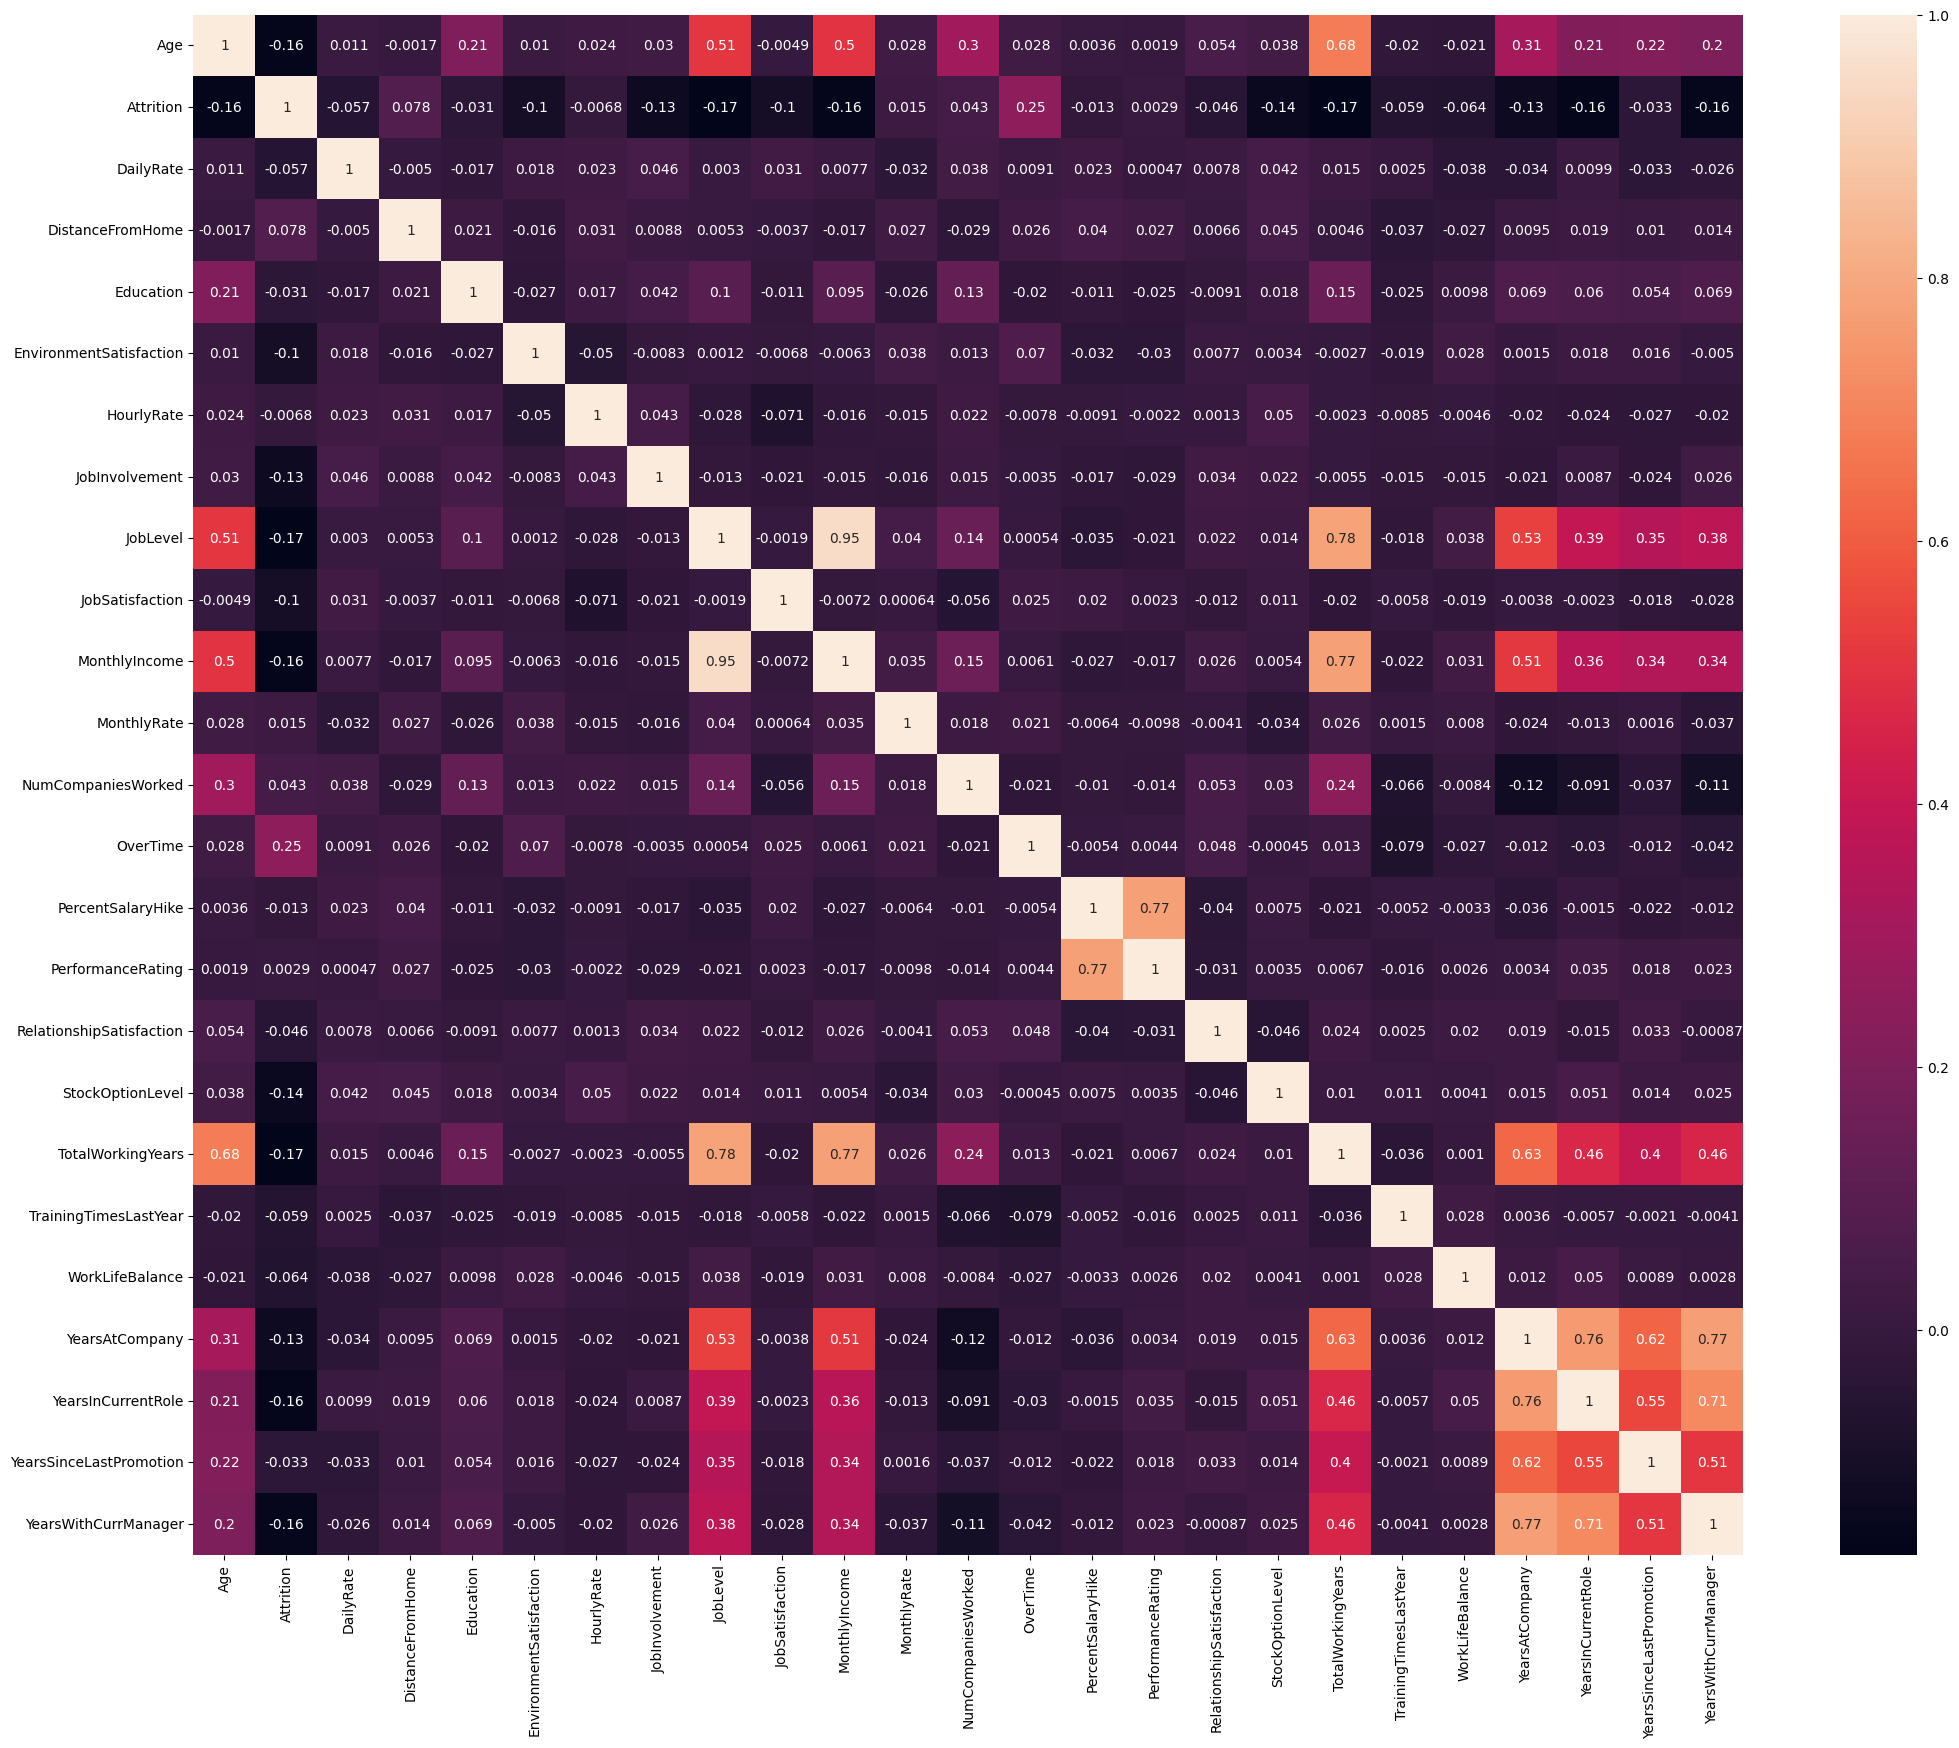

In [18]:
# show the correlation heat map as below
correlations = numeric_df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlations, annot=True)

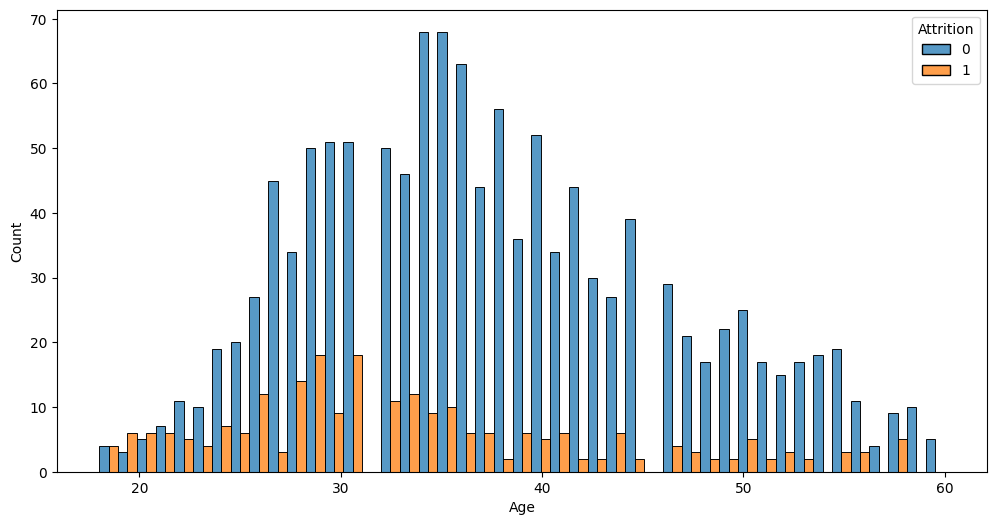

In [19]:
# Plotting a histogram of the 'Age' column
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x='Age',bins=45,hue='Attrition',multiple="dodge")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


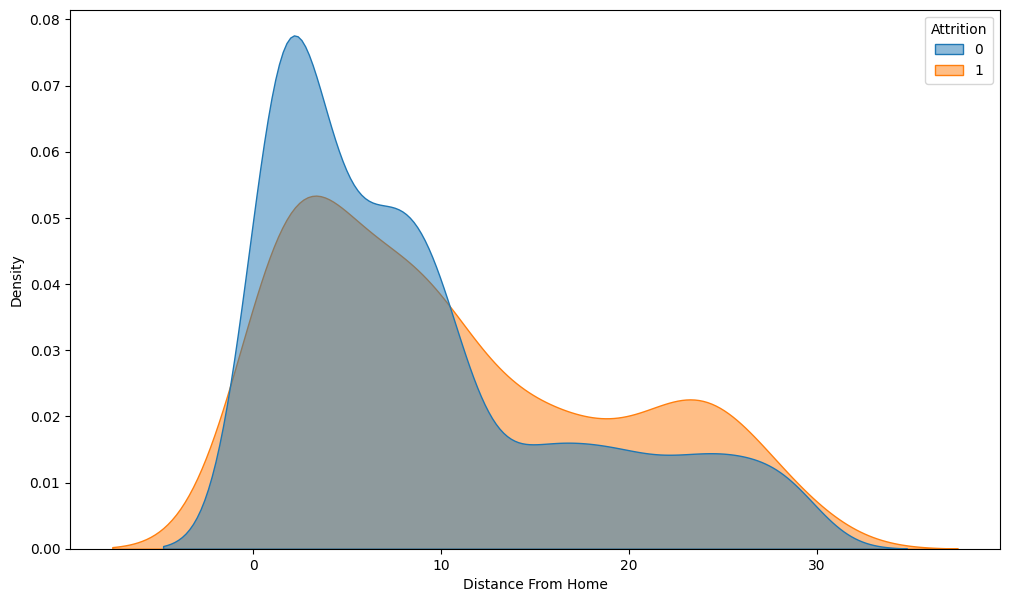

In [20]:
# create a Kernel Density Estimate comparing 'Employees who left' and 'Employees who Stayed' using 'Distance From Home'
plt.figure(figsize=(12,7))
sns.kdeplot(data=df,x='DistanceFromHome',hue='Attrition',fill=True,common_norm=False,alpha=0.5)
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.show()




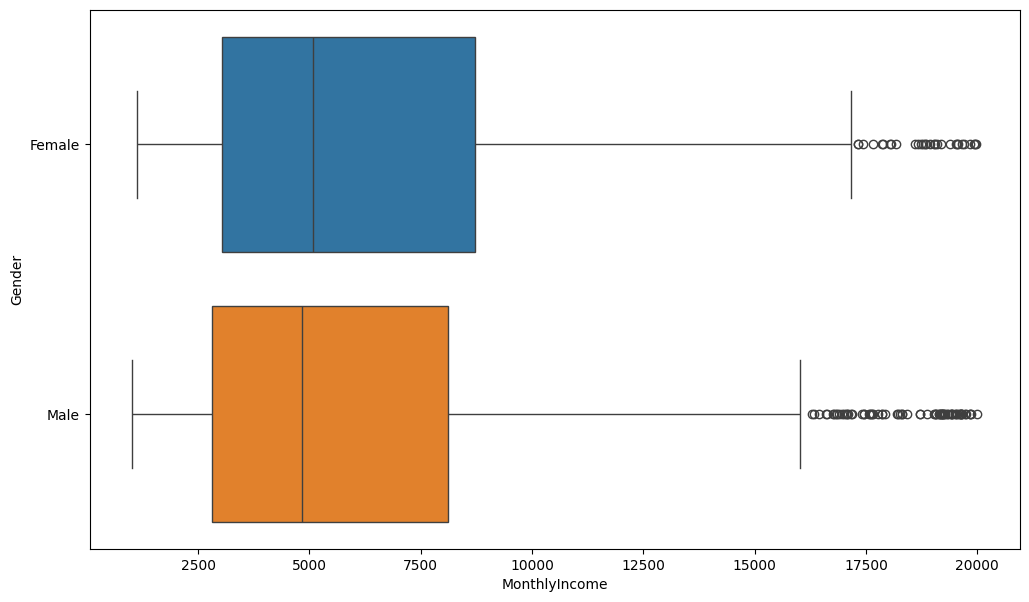

In [21]:
# Let's see the Gender vs. Monthly Income using box plots
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='MonthlyIncome',y='Gender',hue='Gender')
plt.xlabel('MonthlyIncome')
plt.ylabel('Gender')
plt.show()

## Task 4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [23]:
# Convert the categorical fields into numerics using OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()


In [24]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)


# Identify categorical columns (object dtype)
categorical_columns = df.select_dtypes(include=['object']).columns

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2,87,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
df_features = df.drop('Attrition', axis=1)

In [26]:
# select your features here i.e. drop the target 'Atrittion'

In [27]:
# scale your features data assigning it variable X
# Let's scale the data first
scaler = StandardScaler()
X = scaler.fit_transform(df_features)
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546]], shape=(1470, 50))

In [28]:
# select your dependent, target or response data as "Attrition" using variable y
y= df['Attrition']

In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [31]:
# Let's scale the data first

scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[ 0.4463504 ,  2.28090588,  0.74252653, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -0.4384223 , -1.2977746 , ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  ,  2.28090588,  1.41436324, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.4384223 , -1.60518328, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521, -0.4384223 ,  0.54667746, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.4384223 , -0.43256792, ..., -0.53487311,
         1.08823234, -0.68556546]], shape=(1470, 51))

In [32]:
normalized_df.shape

(1470, 51)

In [33]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_df)
  wcss_values.append(kmeans.inertia_)


C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less

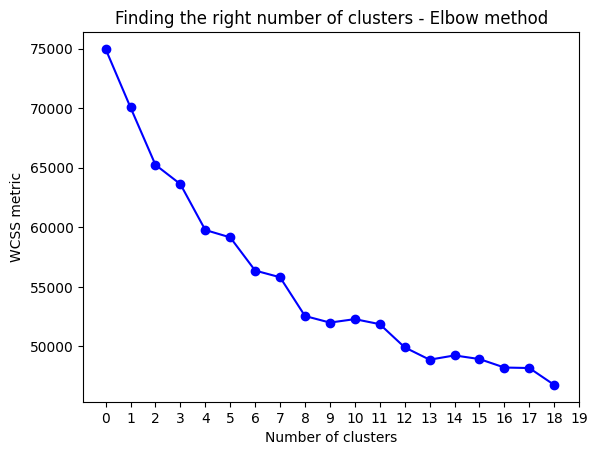

In [34]:
# Create a visualization for Finding the right number of clusters - Elbow method'
plt.plot(wcss_values,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()
# From this we can observe that, 3th cluster seems to be forming the elbow of the curve. 

## APPLY K-MEANS METHOD

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans=KMeans(9)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


(9, 51)

In [38]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [39]:
labels = kmeans.labels_
labels

array([5, 0, 2, ..., 6, 5, 2], shape=(1470,), dtype=int32)

In [40]:
set(labels)

{np.int32(0),
 np.int32(1),
 np.int32(2),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8)}

In [41]:
labels.shape # or len(labels)

(1470,)

In [42]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([df, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids     

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,centroid
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7
4,27,0,591,2,1,1,40,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1466,39,0,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
1467,27,0,155,4,3,2,87,4,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
1468,49,0,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5


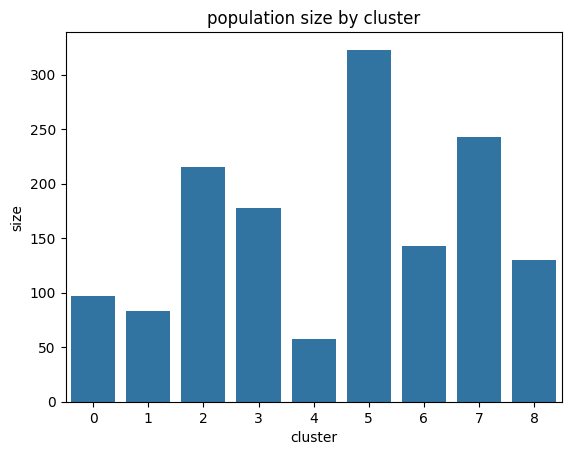

In [43]:
# Check size of each cluster - Are they all representative?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [45]:
from sklearn.decomposition import PCA

In [46]:
# Obtain the principal components 
pca = PCA(n_components=4)
principal_components = pca.fit_transform(normalized_df)
principal_components

array([[-0.31207651, -2.5289499 , -1.1245121 ,  2.05531324],
       [ 0.1125482 ,  1.56140755, -0.23417281, -0.39853307],
       [-3.14731745,  0.82310988, -0.20295245,  1.24497647],
       ...,
       [-0.9982188 ,  1.3345002 ,  0.1695891 , -1.19593277],
       [ 1.19828399, -1.97070393, -0.24153584, -0.52065741],
       [-1.40257413,  1.18839979,  0.20966103, -1.0937106 ]],
      shape=(1470, 4))

In [47]:
# All samples projected on the 4 principal components
principal_components.shape

(1470, 4)

In [48]:
# Create a dataframe with the 4 components
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2', 'pca3', 'pca4'])
pca_df.head()

,pca1,pca2,pca3,pca4
0,-0.312077,-2.528950,-1.124512,2.055313
1,0.112548,1.561408,-0.234173,-0.398533
2,-3.147317,0.823110,-0.202952,1.244976
3,-1.124956,1.111898,-0.648923,0.825053
4,-2.051061,1.266276,0.515406,-1.223070


In [49]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,pca3,pca4,cluster
0,-0.312077,-2.528950,-1.124512,2.055313,5
1,0.112548,1.561408,-0.234173,-0.398533,0
2,-3.147317,0.823110,-0.202952,1.244976,2
3,-1.124956,1.111898,-0.648923,0.825053,7
4,-2.051061,1.266276,0.515406,-1.223070,2


C:\Users\Jin yuheng\AppData\Local\Temp\ipykernel_39100\1772055714.py:3: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.


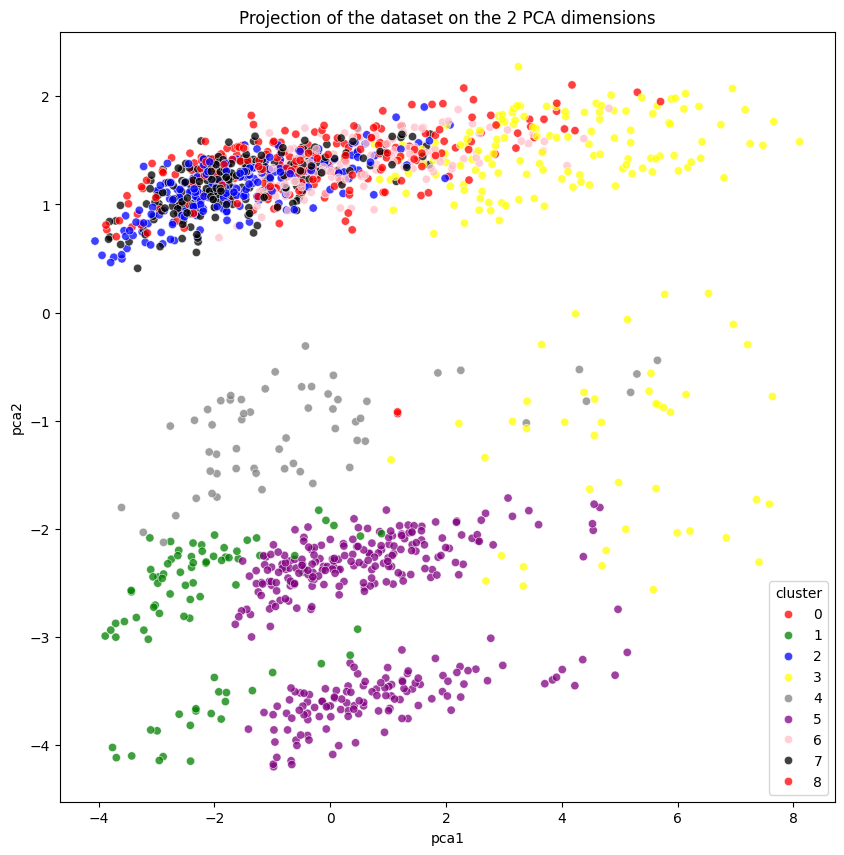

In [50]:
# Create a scatterplot visual of Projection of the dataset on the 4 PCA dimensions'
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue','yellow','gray','purple','pink','black'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

In [51]:
# show the % of the total variance explained by each principal component. Overall close to 48% explained by these two.
pca.explained_variance_ratio_

array([0.10588439, 0.06915558, 0.05169992, 0.04225172])

In [52]:
print(np.sum(pca.explained_variance_ratio_))

0.2689916081482565


## AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [54]:
#import the autoencoder libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
# create your autoencoder with all the features showing bottleneck, encoder,decoder,autoencoder
# compile the autoencoder using optimizer='adam', loss='mean_squared_error'

# Build the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 4  # bottleneck choose based on experimentation
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer) #Encoder

#decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

#autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder using optimizer='adam', loss='mean_squared_error'
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [153]:
# Show the autoencoder summary
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454 (1.77 KB)

 Trainable params: 454 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
## Train autoencoder using input = output
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0213 - val_loss: 1.0075
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0266 - val_loss: 1.0044
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0249 - val_loss: 1.0014
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0173 - val_loss: 0.9985
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0276 - val_loss: 0.9957
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0117 - val_loss: 0.9929
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0099 - val_loss: 0.9902
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9991 - val_loss: 0.9876
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0062 - val_loss: 0.9850
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0003 - val_loss: 0.9826
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0006 - val_loss: 0.9801
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0050 - val_loss: 0.9778
E

In [182]:
# Use Autoencoder to reduce the number of features / dimensions and show the dimensions
encoder = Model(inputs=input_layer, outputs=encoded)
X_train_reduced_dimensions = encoder.predict(X_train)
X_test_reduced_dimensions = encoder.predict(X_test)

# Show the reduced dimensions
print(X_test_reduced_dimensions)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[8.5922165 1.6091326 1.8637992 0.       ]
 [0.        1.8853163 2.901446  0.       ]
 [0.        0.        0.        3.2665994]
 ...
 [6.6319723 0.        0.        2.4233785]
 [0.        5.4515514 4.014137  0.       ]
 [0.        3.4575272 0.        1.956713 ]]


### Apply KMEANS to encoded dataset

In [193]:
# Apply KMEANS to encoded dataset here
def apply_kmeans(data):
    sse = []
    for k in range(1,20):
        kmeans= KMeans(n_clusters= k)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)   
        
    plt.figure()
    plt.plot(range(1,20),sse,marker='o')
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
    plt.title('Pick optimal number of clusters using Elbow method')
    plt.legend()
    plt.show()

    # Choose the optimal number of clusters
    optimal_k = 3  # Choose based on the elbow point
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(data)
    
    return kmeans, clusters

C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less

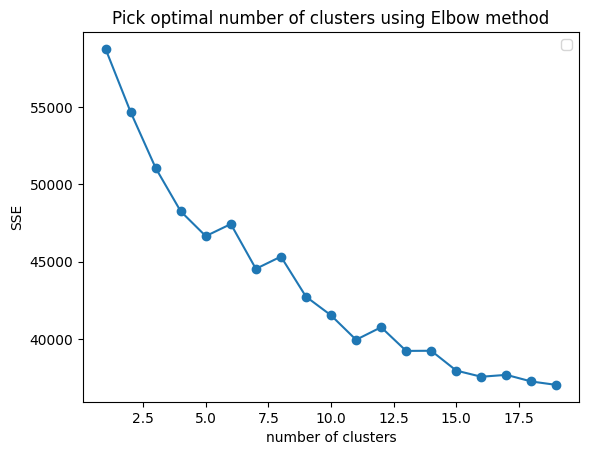

C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less

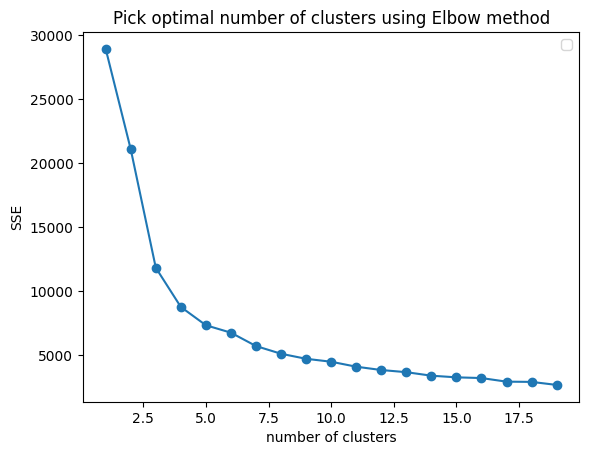

C:\Users\Jin yuheng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.


In [197]:
# Apply KMeans to both the unreduced and reduced datasets
kmeans_orig, clusters_orig = apply_kmeans(X_train)
kmeans_reduced, clusters_reduced = apply_kmeans(X_train_reduced_dimensions)

In [213]:
## Show the centroids shape
print("Original centroids shape:",kmeans_orig.cluster_centers_.shape)
print("Reduced centroids shape:",kmeans_reduced.cluster_centers_.shape)

Original centroids shape: (3, 50)
Reduced centroids shape: (3, 4)


In [215]:
# show the clusters shape
print("Original clusters shape:",clusters_orig.shape)
print("Reduced clusters shape:", clusters_reduced.shape)

Original clusters shape: (1176,)
Reduced clusters shape: (1176,)


In [217]:
# concatenate the clusters to the data
df_train = pd.DataFrame(X_train)
df_train['Cluster_Original'] = clusters_orig
df_train['Cluster_Reduced'] = clusters_reduced



In [219]:
# show the 'Number of samples" in your current consolidated
print(df_train['Cluster_Original'].value_counts())
print(df_train['Cluster_Reduced'].value_counts())


Cluster_Original
1    591
2    359
0    226
Name: count, dtype: int64
Cluster_Reduced
2    598
0    299
1    279
Name: count, dtype: int64


In [221]:
## Apply PCA to encoded dataset
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_reduced_dimensions)
df_train['PCA1'] = pca_result[:, 0]
df_train['PCA2'] = pca_result[:, 1]


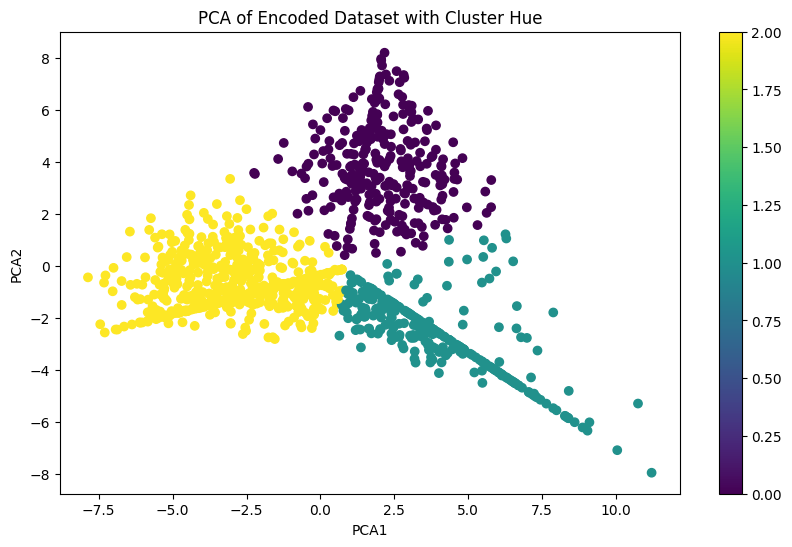

In [223]:
## Plot your pca scatterplot with clusters as the hue
# Plot PCA scatterplot with clusters as the hue
plt.figure(figsize=(10, 6))
plt.scatter(df_train['PCA1'], df_train['PCA2'], c=df_train['Cluster_Reduced'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Encoded Dataset with Cluster Hue')
plt.colorbar()
plt.show()